# Module 1 : Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
creditcard_train=pd.read_csv('creditcard_train.csv')
creditcard_train.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
print("{} Rows and {} Columns".format(creditcard_train.shape[0],creditcard_train.shape[1]))

284657 Rows and 31 Columns


We can gauge from the the max and min time the duration during which the transactions were recorded
172792 seconds ~ 48 hours ~ 2 days

In [5]:
print('First time: {} Last time: {}'.format(creditcard_train['Time'].min() ,creditcard_train['Time'].max()))

First time: 0.0 Last time: 172792.0


The data is highly unbalanced 

In [6]:
print('{} fraud transactions out of a total transactions of {}'.format(creditcard_train[creditcard_train['Class']==1].shape[0], creditcard_train.shape[0]))

442 fraud transactions out of a total transactions of 284657


#### Dealing with Missing Values and Outliers 

In [7]:
sum(creditcard_train.isnull().values.any(axis=1))

798

In [8]:
creditcard_train.isna().sum()

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In [9]:
creditcard_train.dropna(axis=0,inplace=True)
creditcard_train.shape

(283859, 31)

#### Checking the outliers

In [10]:
q1 = creditcard_train.iloc[:,1:29].quantile(q=0.25)
q3 = creditcard_train.iloc[:,1:29].quantile(q=0.75)

IQR = q3 - q1
creditcard_train['Outliers'] = ((creditcard_train.iloc[:,1:29] < (q1 - 2.5 * IQR)) | 
                                (creditcard_train.iloc[:,1:29] > (q3 + 2.5 * IQR))).sum(axis=1) > 0
creditcard_train['Outliers']

0         False
1         False
2         False
3         False
4         False
          ...  
284652     True
284653    False
284654    False
284655     True
284656    False
Name: Outliers, Length: 283859, dtype: bool

In [11]:
creditcard_train[creditcard_train['Class'] == 1]['Outliers'].sum()

406

Deleting the outliers will result in ~92% of the cases of fraud being lost although the proportion of the fraud casesmwill remain the same, however it is sensible to keep the outlier fraud data as it might illustrate some important unusual data about fruad which the model may be able to detect

# Module 2

What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


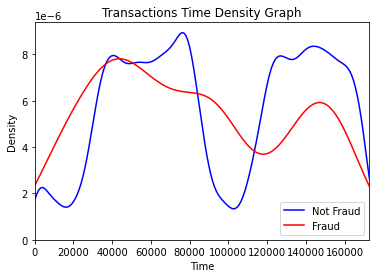

In [12]:
sns.distplot(creditcard_train[creditcard_train['Class'] == 0]["Time"], color='b',hist = False, label = 'Not Fraud');

sns.distplot(creditcard_train[creditcard_train['Class'] == 1]["Time"], color='r',hist = False, label = 'Fraud');

plt.xlim([0,creditcard_train['Time'].max()])
plt.title('Transactions Time Density Graph');
plt.legend();

#### Visualizing the distribution of time and amount

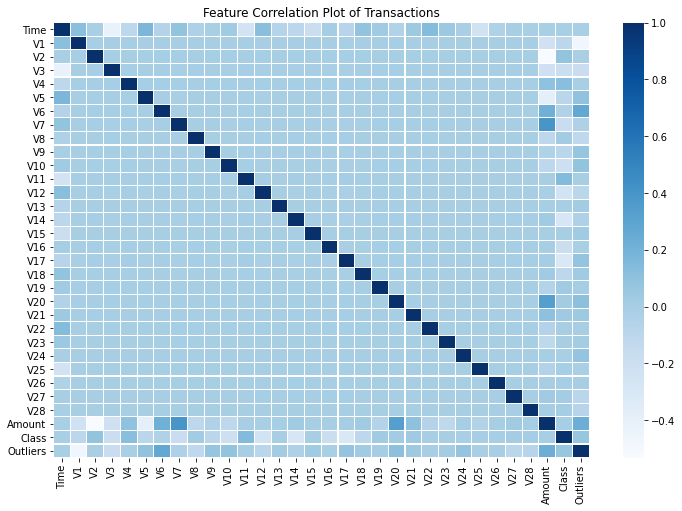

In [13]:
plt.figure(figsize=(12,8))
corr=creditcard_train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.1,cmap='Blues')
plt.title('Feature Correlation Plot of Transactions');

#### Correlations between all the attributes including the target columns 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

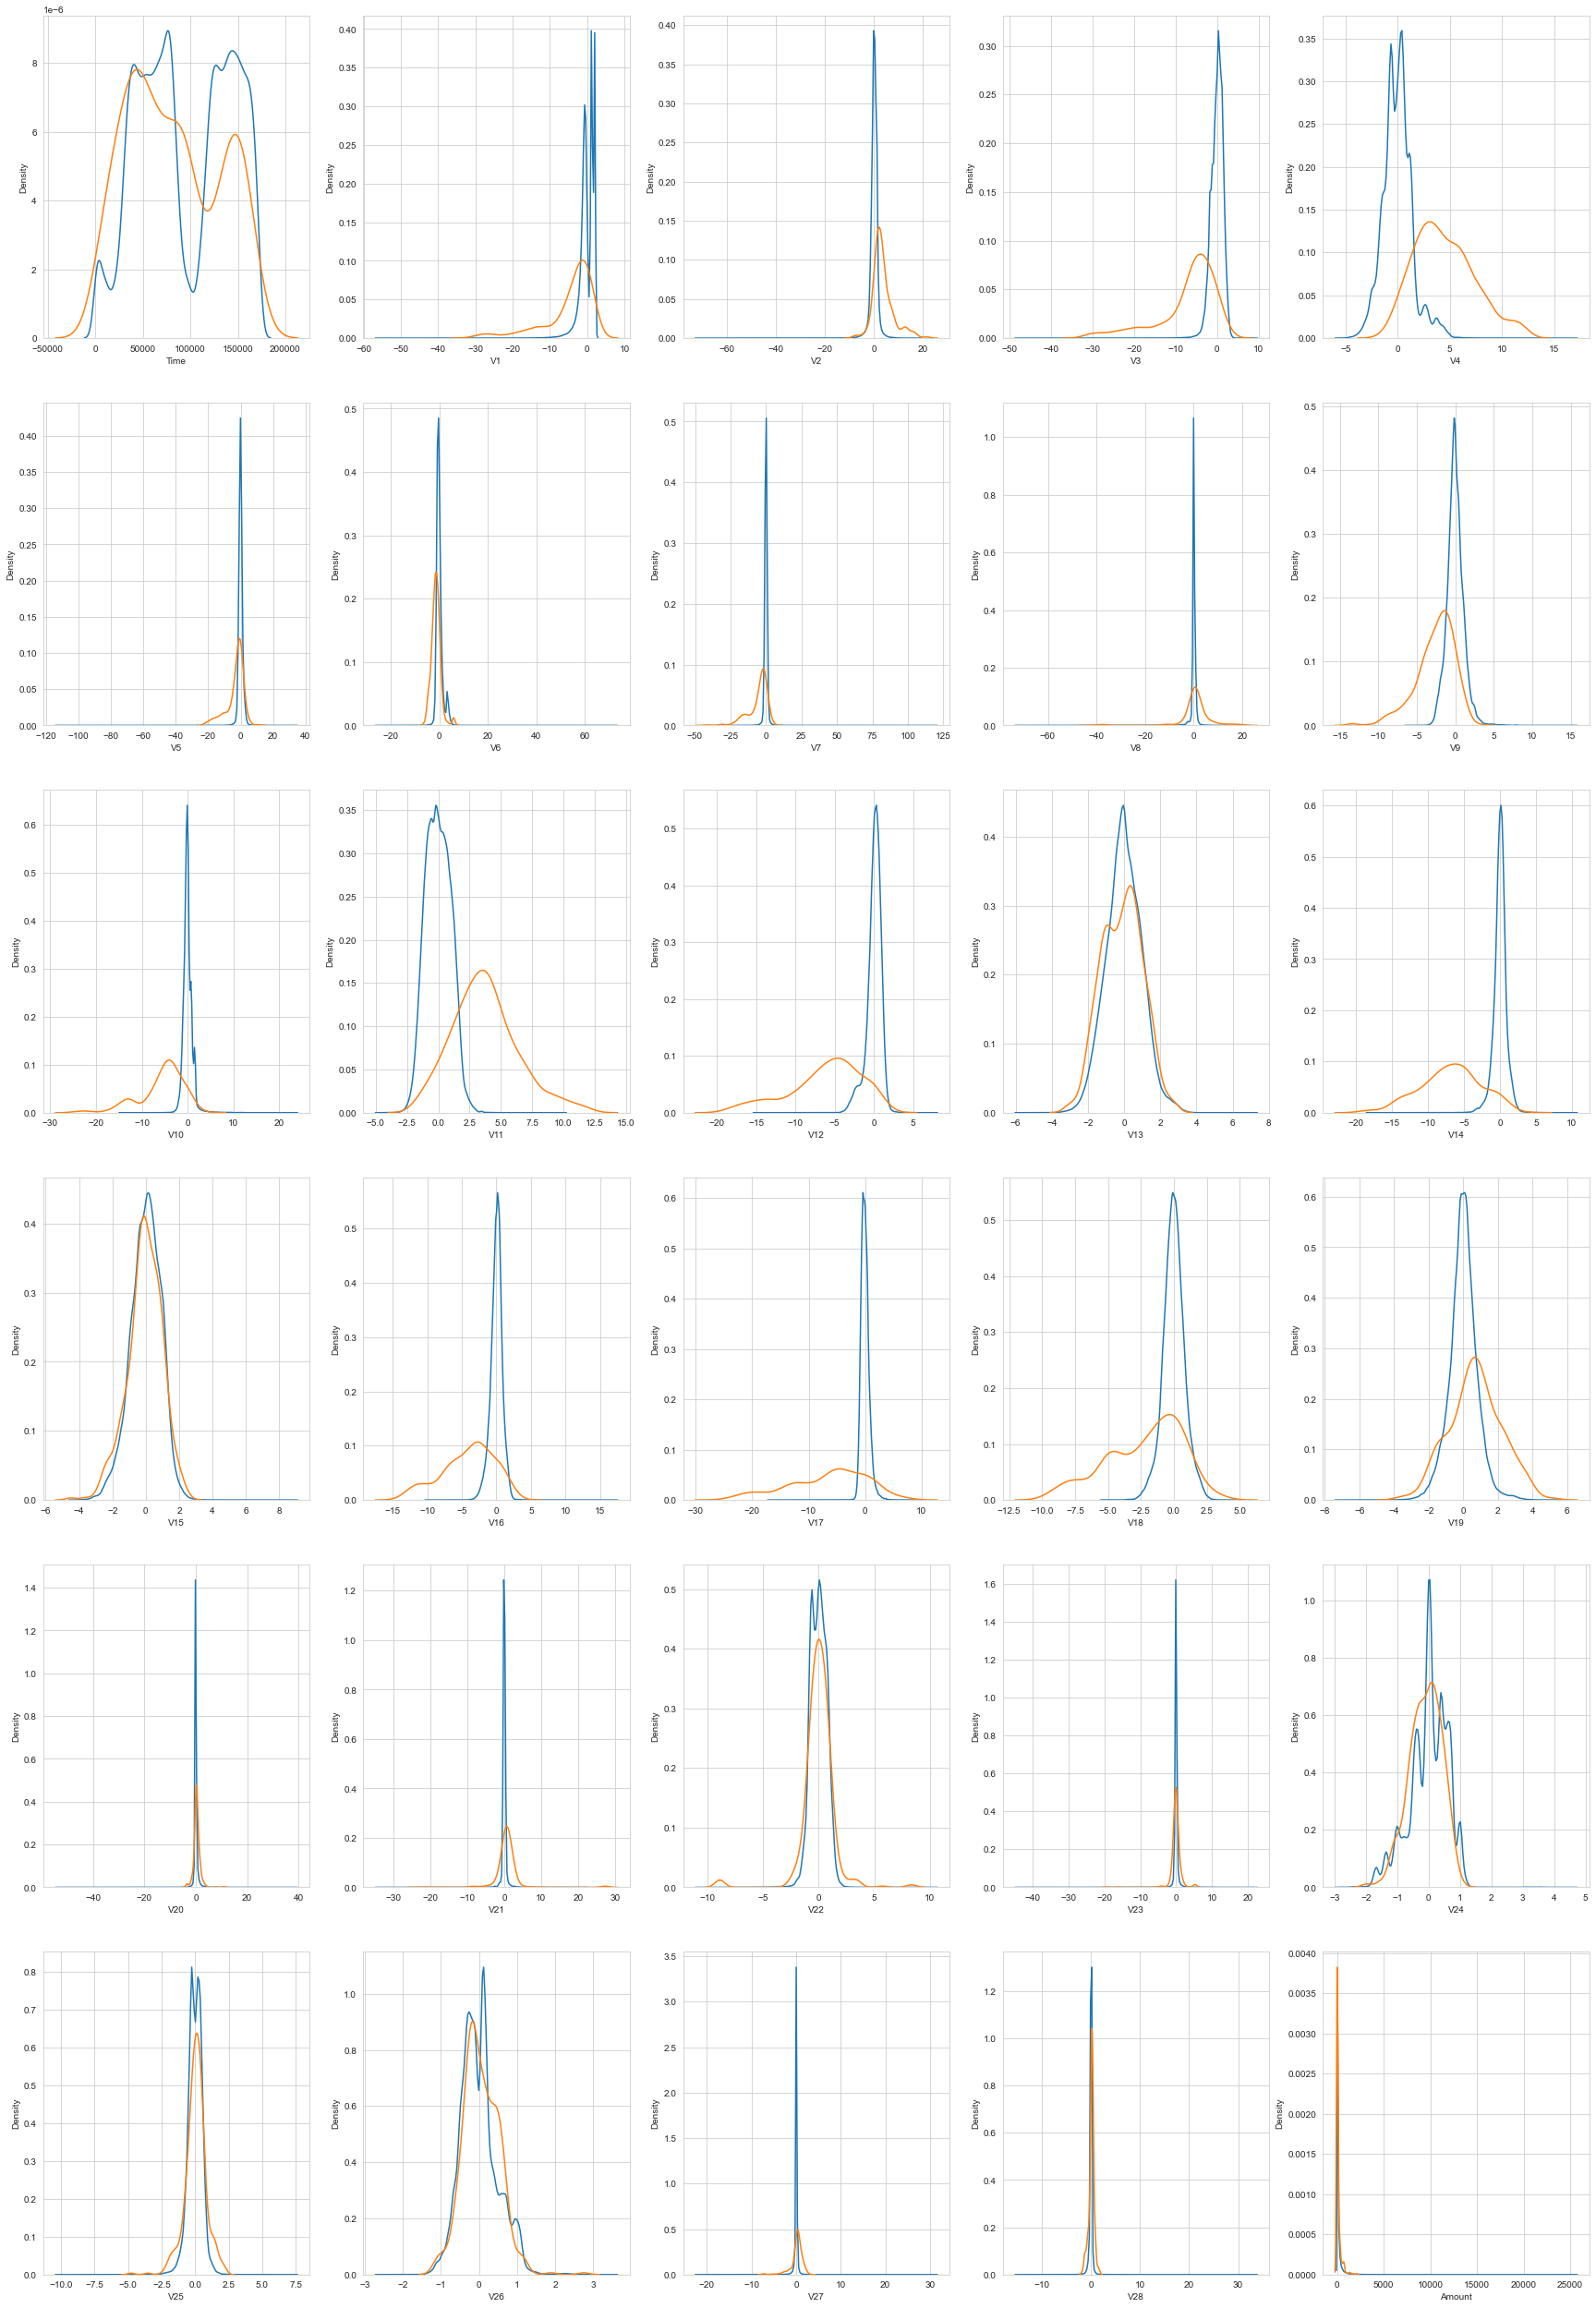

In [14]:
counter = 0
normal=creditcard_train.loc[creditcard_train['Class']==0]
fraud=creditcard_train.loc[creditcard_train['Class']==1]
sns.set_style('whitegrid')
fig,ax=plt.subplots(6,5,figsize=(30,45))
for feature in creditcard_train.columns.values[0:30]:
    counter+=1
    plt.subplot(6,5,counter)
    sns.distplot(normal[feature],label='Class 0',hist=False)
    sns.distplot(fraud[feature],label='Class 1',hist=False)
    plt.xlabel(feature)
    plt.tick_params(axis='x',labelsize=10)
    plt.tick_params(axis='y',labelsize=10)
plt.show()

#### Features V4, V11, V12 and V14 have clearly separated distributions for Fraud and Not Fraud groups;

<Figure size 3600x1800 with 0 Axes>

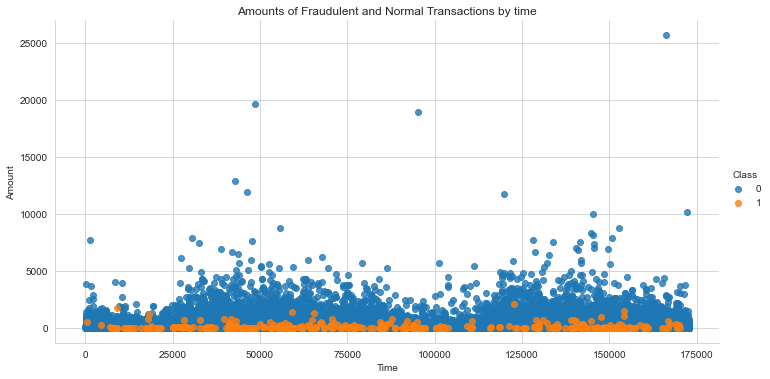

In [15]:
plt.figure(figsize=(12,6), dpi = 300);
sns.lmplot(y="Amount", x="Time",data=creditcard_train, hue='Class', fit_reg=False, aspect = 2, scatter_kws={'alpha':0.8})
plt.title("Amounts of Fraudulent and Normal Transactions by time",fontsize=12);

# Module 3

standardizing the data before dimensionality reduction 

In [16]:
from sklearn.preprocessing import StandardScaler
f_mat= creditcard_train.drop(columns=['Class'])
df=pd.DataFrame(creditcard_train['Class'])
t_arr = df
f_mat=StandardScaler().fit_transform(f_mat)

Using the PCA dimension reduction algorithm, we will 1st study the variance trade off using n = 2 principal components 

The model components are:
 [[-2.04265590e-02 -3.00885079e-01 -3.15609814e-01 -1.79277911e-01
   5.66597579e-02 -1.99211035e-01  2.21716143e-01  2.20081220e-01
  -1.00538915e-01 -7.91835995e-04 -3.00255564e-02  3.82631079e-03
  -3.85456545e-02  1.25177477e-02  9.45104953e-03  1.49080571e-02
  -4.17182038e-03  3.61912311e-02  3.20886832e-02 -2.98089288e-02
   2.37228090e-01  7.71362399e-02 -4.26255432e-02 -6.13393857e-02
   3.14299500e-02 -2.90220002e-02 -1.69234177e-03 -1.38446876e-02
  -2.02243211e-02  6.38250814e-01  3.78130750e-01]
 [-7.05264797e-01 -1.04054465e-01  1.43991447e-02  4.43649935e-01
   1.06335414e-01 -1.70594260e-01  5.59281629e-02 -8.78624133e-02
   3.94396972e-02  1.08722033e-04 -3.25322503e-02  2.59470330e-01
  -1.29306491e-01  7.22092283e-02  1.11082567e-01  1.93163252e-01
  -1.02319555e-02  7.26082947e-02 -9.80279319e-02 -2.87969106e-02
   4.26458381e-02 -4.67506975e-02 -1.43599399e-01 -5.18990196e-02
   1.64360123e-02  2.37343323e-01  3.94824205e-02  1.06727556e-0

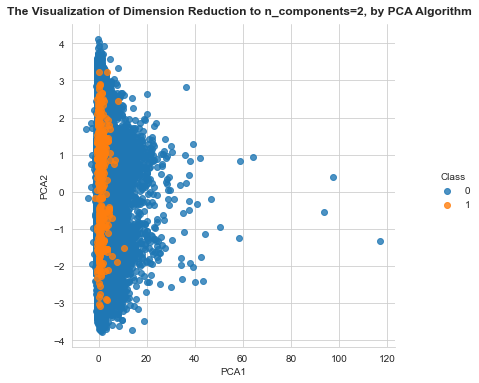

In [17]:
from sklearn.decomposition import PCA
import seaborn as sns
model=PCA(n_components=2)
model.fit(f_mat)
print('The model components are:\n',model.components_,'\n')
print('The model explained variance is',model.explained_variance_,'\n')
print('The model explained variance ratio is',model.explained_variance_ratio_,'\n')
x_2D=model.transform(f_mat)
creditcard_train['PCA1']=x_2D[:,0]
creditcard_train['PCA2']=x_2D[:,1]
sns.lmplot(x="PCA1",y="PCA2",hue='Class',data=creditcard_train,fit_reg=False)
plt.suptitle('The Visualization of Dimension Reduction to n_components=2, by PCA Algorithm',y=1.02,fontweight='bold');

The variance is too small if the n_components is only equal to 2. We will now try and achieve more than a 95% variance 

In [18]:
from sklearn.decomposition import PCA
import seaborn as sns
model = PCA(.95)
model.fit(f_mat)
x_2D=model.transform(f_mat)
creditcard_train['PCA1']=x_2D[:,0]
creditcard_train['PCA2']=x_2D[:,1]
print('The variance is',model.explained_variance_ratio_.sum(),' and in % it is',model.explained_variance_ratio_.sum()*100,'%.')

The variance is 0.9770705773937769  and in % it is 97.70705773937769 %.


# Module 4

#### Running PCA again with 20 components

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score

#### Undersampling the training dataset to balance the samples of fraudulent and normal transactions 
continuing with the fact that no outliers were removed and null values were

In [20]:
from imblearn.under_sampling import RandomUnderSampler
df=pd.read_csv('creditcard_train.csv')
df=df.dropna()
df_y=pd.DataFrame(df['Class'])
df_x=df.drop(columns=['Class'])
sampler = RandomUnderSampler(random_state=0)
training_x, training_y = sampler.fit_resample(df_x,df_y)
print(training_y.value_counts())

Class
0        442
1        442
dtype: int64


#### Loading in the test dataset provided to us 

In [21]:
df2=pd.read_csv('creditcard_test.csv')
test_y=pd.DataFrame(df2['Class'])
test_x=df2.drop(columns=['Class'])

Model 1 : Gaussian NB

The accuracy score for the model is 0.92 or 92.0%


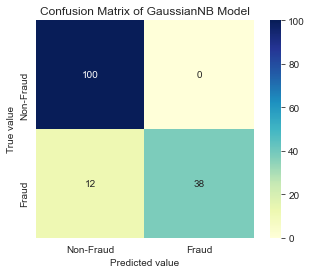

In [23]:
model = GaussianNB().fit(training_x,training_y.values.ravel())
pred_y = model.predict(test_x)

print('The accuracy score for the model is {} or {}%'.format(accuracy_score(test_y,pred_y), accuracy_score(test_y,pred_y)*100))

labels= ['Non-Fraud', 'Fraud'] 
mat = confusion_matrix(test_y,pred_y)
sns.heatmap(mat, xticklabels= labels, yticklabels= labels,square=True, annot=True, cbar=True,fmt='',cmap='YlGnBu')
plt.title("Confusion Matrix of GaussianNB Model")
plt.xlabel('Predicted value')
plt.ylabel('True value');

Performing 5 fold cross validation 

In [24]:
crossval_gnb = cross_val_score(GaussianNB(),training_x,y=training_y.values.ravel(),cv=5)

print('Each of the cross-validation results are {} which also means {} in percentage form'.format(crossval_gnb, crossval_gnb*100))
print('The average cross-validation score is {} or {}%'.format(crossval_gnb.mean(), crossval_gnb.mean()*100))

Each of the cross-validation results are [0.92090395 0.85875706 0.76271186 0.9039548  0.80681818] which also means [92.09039548 85.87570621 76.27118644 90.39548023 80.68181818] in percentage form
The average cross-validation score is 0.8506291730868002 or 85.06291730868001%


Model 2 : Decision Tree Classifier 

The accuracy score for the model is 0.8866666666666667 or 88.66666666666667%


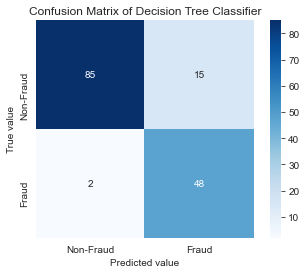

In [25]:
model = DecisionTreeClassifier().fit(training_x,training_y)
pred_y = model.predict(test_x)

print('The accuracy score for the model is {} or {}%'.format(accuracy_score(test_y,pred_y), accuracy_score(test_y,pred_y)*100))
labels= ['Non-Fraud', 'Fraud'] 
mat = confusion_matrix(test_y,pred_y)
sns.heatmap(mat, xticklabels= labels, yticklabels= labels,square=True, annot=True, cbar=True,fmt='',cmap='Blues')
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.xlabel('Predicted value')
plt.ylabel('True value');

Performing 5 fold cross validation 

In [26]:
crossval_dtc = cross_val_score(DecisionTreeClassifier(),training_x,y=training_y.values.ravel(),cv=5)

print('Each of the cross-validation results are {} which also means {} in percentage form'.format(crossval_dtc, crossval_dtc*100))
print('The average cross-validation score is {} or {}%'.format(crossval_dtc.mean(), crossval_dtc.mean()*100))

Each of the cross-validation results are [0.51977401 0.85310734 0.88700565 0.88700565 0.875     ] which also means [51.97740113 85.31073446 88.70056497 88.70056497 87.5       ] in percentage form
The average cross-validation score is 0.8043785310734464 or 80.43785310734464%


Model 3 : Logistic Regression

The accuracy score for the model is 0.8933333333333333 or 89.33333333333333%


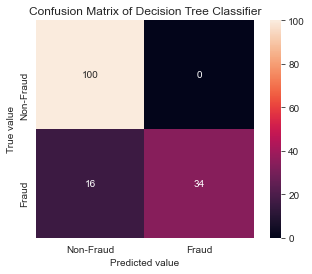

In [27]:
model = LogisticRegression(max_iter=1000).fit(df_x,df_y.values.ravel())
pred_y = model.predict(test_x)

print('The accuracy score for the model is {} or {}%'.format(accuracy_score(test_y,pred_y), accuracy_score(test_y,pred_y)*100))

labels = ['Non-Fraud', 'Fraud'] 
mat = confusion_matrix(test_y,pred_y)
sns.heatmap(mat, xticklabels= labels, yticklabels= labels,square=True, annot=True, cbar=True,fmt='')
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.xlabel('Predicted value')
plt.ylabel('True value');

Performing 5 fold cross validation 

In [28]:
crossval_LR=cross_val_score(LogisticRegression(max_iter=1000),training_x,y=training_y.values.ravel(),cv=5)

print('Each of the cross-validation results are {} which also means {} in percentage form'.format(crossval_LR, crossval_LR*100))
print('The average cross-validation score is {} or {}%'.format(crossval_LR.mean(), crossval_LR.mean()*100))

Each of the cross-validation results are [0.91525424 0.93220339 0.9039548  0.89830508 0.875     ] which also means [91.52542373 93.22033898 90.39548023 89.83050847 87.5       ] in percentage form
The average cross-validation score is 0.9049435028248588 or 90.49435028248588%


Gaussian NB, Decision Trees, and Logistic Regression have done all done a decent job modelling the data, with more than 85% accuracy. From the accuracy scores result, we can observe that the Logistic Regression model is the best among the three.

# Module 5 

In conclusion, we have initially done some data exploration and visualization. By exploring the dataset, looking at and dealing with missing values and outliers.We dropped the rows that have null values and kept the outliers because the dataset is already highly unbalanced. Removing the outliers would make the dataset even more biased. In visualizing the data we saw the features, how the features are distributed and considered the relationship between different features. Then, we applied an unsupervised learning method, PCA (Principal component analysis) as our dimensionality reduction method to minimize the number of variables. A variance level of 95% is a good benchmark so we did made sure of it with certain commands.

Finally in module 4, we used the dataset to train different models which are Gaussian NB, Decision Tree Clasifier, and Logistic Regression. Data for training and testing were serperately provided and used as such. For each model, the analysis consisted of the accuracy score, a confusion matrix and performed the 5 fold cross validation technique. 
We conclude that the Logistic Regression model is the best among the three.

